In [24]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


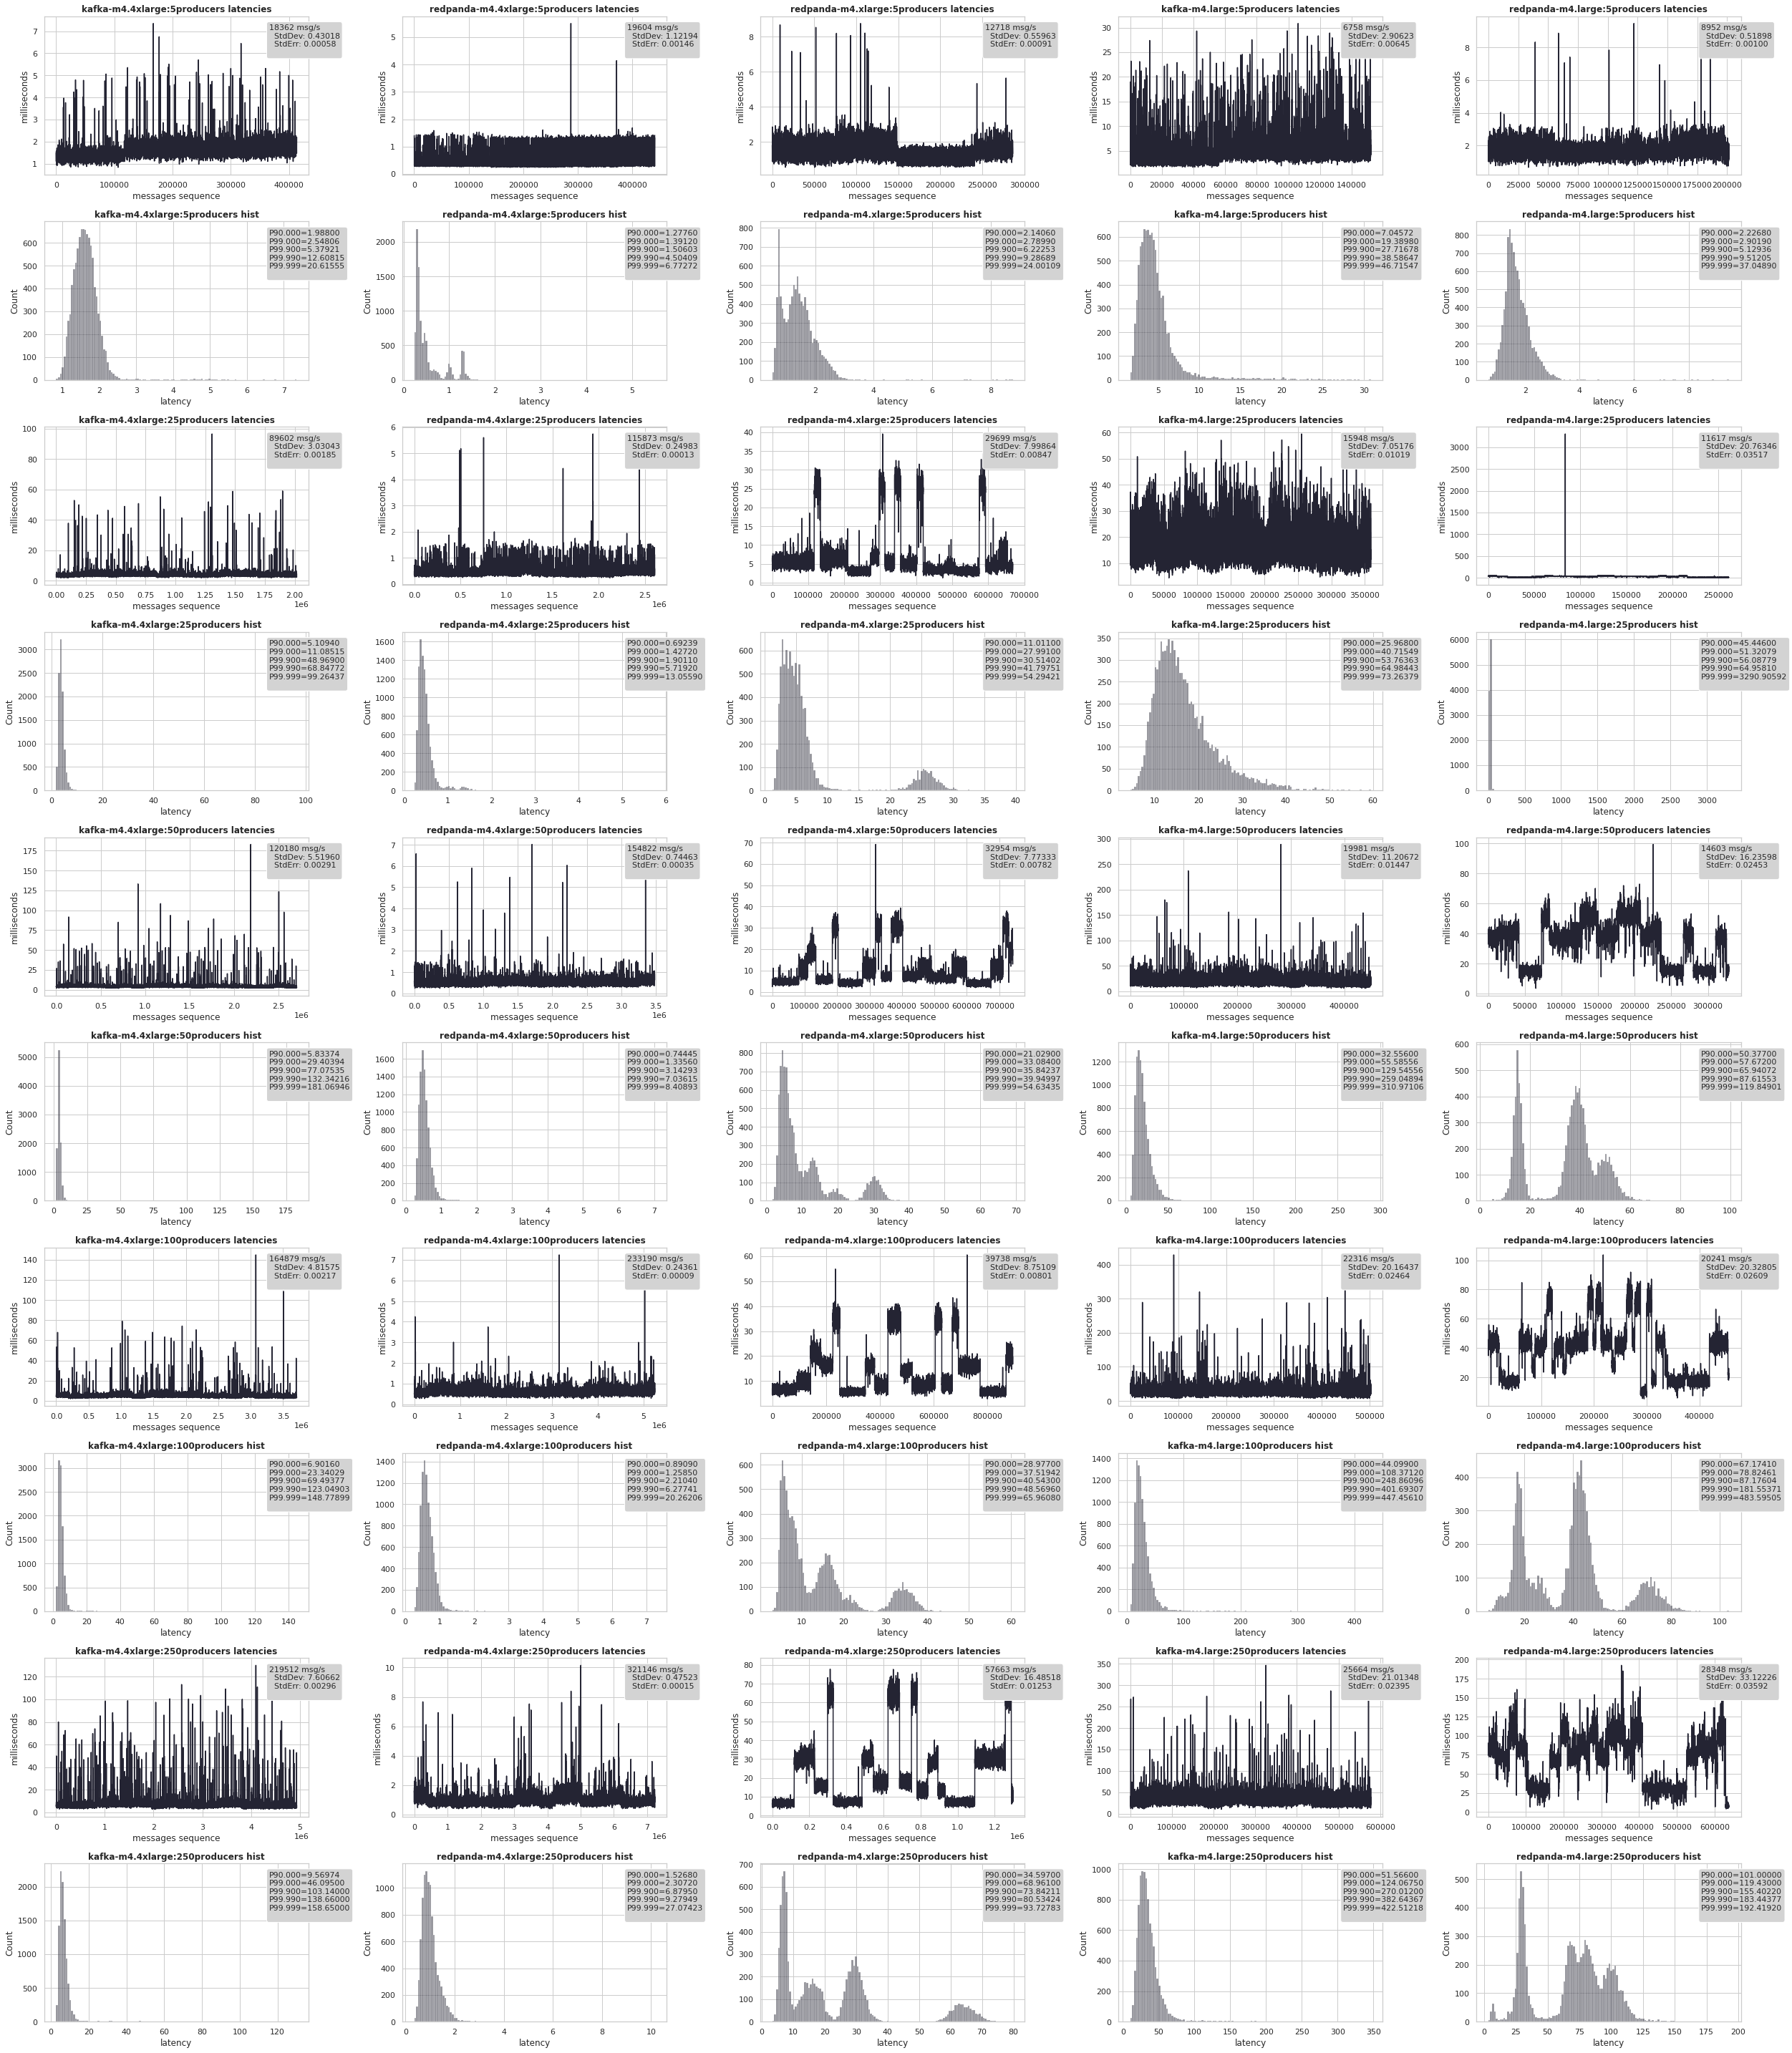

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


def draw_it(tests, envs):
  sn.set_theme(style="whitegrid", palette=sn.dark_palette("blue"))

  fig = plt.figure(figsize=[35, 8 * len(tests)])

  for i, test in enumerate(tests):
    for j, env in enumerate(envs):

      # print(f"###### {env}:{test} ######\n")
      df = pd.read_csv(f'/gdrive/My Drive/benchmarks/{env}/{test}/latencies.csv', names=["latency"])

      # * 10 because data is 10% sampling
      # / 300 because benchmark ran for 5 minutes (300 sec)
      thr = len(df)*10/300
      std = df.std()['latency']
      gtext = f'''{int(thr)} msg/s
  StdDev: {std:1.5f}
  StdErr: {df.sem()['latency']:1.5f}
  '''
      htext = ""
      for q in [0.9,0.99,0.999,0.9999,0.99999]:
        htext+=f"P{q*100:1.3f}={df.quantile(q)['latency']:03.5f}\n"


      df = df[:int((len(df)/4) * 3)].sample(n=10000) # limit number of samples
      
      ax1 = fig.add_subplot(len(tests) * 2, len(envs), i*len(envs)*2+j+1, xlabel="messages sequence", ylabel="milliseconds")
      ax1.set_title(f"{env}:{test} latencies", fontdict={'fontsize': 12, 'fontweight': "bold"})
      ax1.minorticks_on()
      sn.lineplot(data=df, ax=ax1, legend=False)
      #plt.yscale("log")
    
      props = dict(boxstyle='round', facecolor='lightgrey', alpha=1)

      ax1.text(0.85, 0.95, gtext, transform=ax1.transAxes, fontsize=11,
          verticalalignment='top', bbox=props)

      ax2 = fig.add_subplot(len(tests) * 2, len(envs), i*len(envs)*2+j+1+len(envs), xlabel="latency")
      ax2.set_title(f"{env}:{test} hist", fontdict={'fontsize': 12, 'fontweight': "bold"})
      ax2.minorticks_on()
      sn.histplot(data=df, bins=128, ax=ax2, legend=False)
      #plt.xscale("log")

      ax2.text(0.85, 0.95, htext, transform=ax2.transAxes, fontsize=11,
          verticalalignment='top', bbox=props)

  fig.tight_layout()


envs = ["kafka-m4.4xlarge","redpanda-m4.4xlarge","redpanda-m4.xlarge","kafka-m4.large","redpanda-m4.large"]
tests = ["5producers","25producers","50producers","100producers","250producers"]

draw_it(tests, envs)